# MNIST: Digit Recognizer Getting Started Challenge

*Author: Benjamin Sautermeister*

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np

### Load Data

In [2]:
train = pd.read_csv('inputs/train.csv')
train.shape

(42000, 785)

In [3]:
test = pd.read_csv('inputs/test.csv')
test.shape

(28000, 784)

#### Convert image data to numpy array of type *float* and split the label out of the training data

In [4]:
x_train = (train.iloc[:, 1:].values).astype(np.float32)
y_train = (train.iloc[:, 0].values).astype(np.int32)
x_test = test.values.astype(np.float32)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Data Visualization

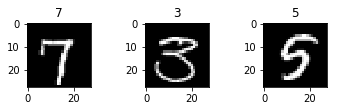

In [6]:
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

### Data Preprocessing

In [7]:
mean_x = x_train.mean().astype(np.float32)
std_x = x_train.std().astype(np.float32)

def standardize(x):
    return (x - mean_x) / std_x

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

### Data splits

In [9]:
seed = 42
np.random.seed(seed)

In [13]:
inputs = x_train
label = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=seed)

### Model

In [14]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(standardize, input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(32,(3,3)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32,(3,3)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64,(3,3)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64,(3,3)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])
    
    optimizer = tf.keras.optimizers.Adam(lr=0.005)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [16]:
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)

In [ ]:
model = create_model()
history = model.fit_generator(
    generator=batches,
    steps_per_epoch=batches.n,
    epochs=5,
    validation_data=val_batches,
    validation_steps=val_batches.n)

Epoch 1/5
27777/37800 [=====================>........] - ETA: 2:36 - loss: 0.0092 - acc: 0.9973

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



37800/37800 [==============================] - 687s 18ms/step - loss: 0.0088 - acc: 0.9975 - val_loss: 0.0394 - val_acc: 0.9923
Epoch 3/5
 8211/37800 [=====>........................] - ETA: 8:57 - loss: 0.0071 - acc: 0.9981

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



37800/37800 [==============================] - 773s 20ms/step - loss: 0.0068 - acc: 0.9982 - val_loss: 0.0533 - val_acc: 0.9921
Epoch 4/5
 7469/37800 [====>.........................] - ETA: 9:15 - loss: 0.0060 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25053/37800 [==================>...........] - ETA: 3:51 - loss: 0.0060 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



37800/37800 [==============================] - 772s 20ms/step - loss: 0.0060 - acc: 0.9985 - val_loss: 0.0627 - val_acc: 0.9914
Epoch 5/5
 2194/37800 [>.............................] - ETA: 10:43 - loss: 0.0062 - acc: 0.9987

In [21]:
def plot_values(train_values, valid_values, y_label):
    epochs = range(1, len(train_values) + 1)
    plt.clf()
    plt.plot(epochs, train_values, 'b')
    if valid_values is not None:
        plt.plot(epochs, valid_values, 'g')
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.show()
    
history_dict = history.history

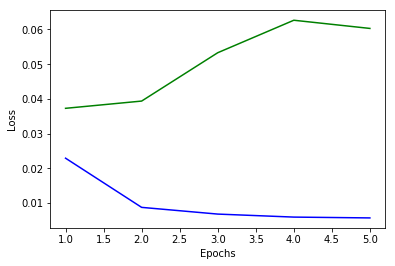

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plot_values(loss_values, val_loss_values, 'Loss')

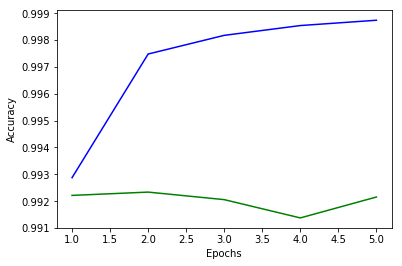

In [23]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plot_values(acc_values, val_acc_values, 'Accuracy')

### Submission

Retrain on full training set

In [26]:
model = create_model()
batches = gen.flow(inputs, label, batch_size=64)
history = model.fit_generator(
    generator=batches,
    steps_per_epoch=batches.n,
    epochs=5)

Epoch 1/5
25403/42000 [=================>............] - ETA: 4:38 - loss: 0.0086 - acc: 0.9974

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



42000/42000 [==============================] - 688s 16ms/step - loss: 0.0081 - acc: 0.9976
Epoch 3/5
 5816/42000 [===>..........................] - ETA: 9:28 - loss: 0.0072 - acc: 0.9980

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



26056/42000 [=================>............] - ETA: 4:11 - loss: 0.0068 - acc: 0.9982

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



42000/42000 [==============================] - 663s 16ms/step - loss: 0.0066 - acc: 0.9983
Epoch 4/5
 7714/42000 [====>.........................] - ETA: 9:05 - loss: 0.0059 - acc: 0.9985

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



42000/42000 [==============================] - 675s 16ms/step - loss: 0.0056 - acc: 0.9986
Epoch 5/5
21719/42000 [==============>...............] - ETA: 5:22 - loss: 0.0056 - acc: 0.9988

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



42000/42000 [==============================] - 656s 16ms/step - loss: 0.0055 - acc: 0.9988


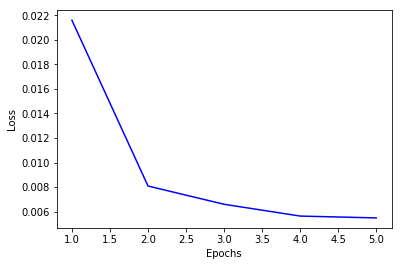

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
plot_values(loss_values, None, 'Loss')

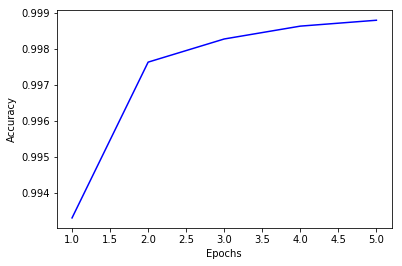

In [28]:
acc_values = history_dict['acc']
plot_values(acc_values, None, 'Accuracy')

In [29]:
predictions = model.predict_classes(x_test, verbose=0)

submissions=pd.DataFrame({
    "ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions
})
submissions.to_csv("submission.csv", index=False, header=True)